In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_pickle('budget_by_genre.pkl')

df.head()
exploded_df = df.explode('genre_list')
exploded_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Action
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Adventure
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Fantasy
1,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-307237650.0,-200237650.0,0.122178,0.427892,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Action
1,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-307237650.0,-200237650.0,0.122178,0.427892,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Adventure


In [2]:
df.genres.value_counts().head(20)

Drama                         68
Adventure,Animation,Comedy    67
Comedy                        56
Comedy,Drama,Romance          52
Action,Adventure,Sci-Fi       52
Comedy,Drama                  49
Comedy,Romance                41
Action,Crime,Drama            39
Documentary                   36
Drama,Romance                 34
Action,Comedy,Crime           32
Action,Adventure,Fantasy      31
Horror,Mystery,Thriller       31
Action,Adventure,Drama        28
Drama,Thriller                25
Horror,Thriller               24
Action,Crime,Thriller         23
Action,Adventure,Comedy       22
Crime,Drama,Thriller          22
Horror                        20
Name: genres, dtype: int64

In [3]:
genre_cats = exploded_df.genre_list.value_counts().head(13)

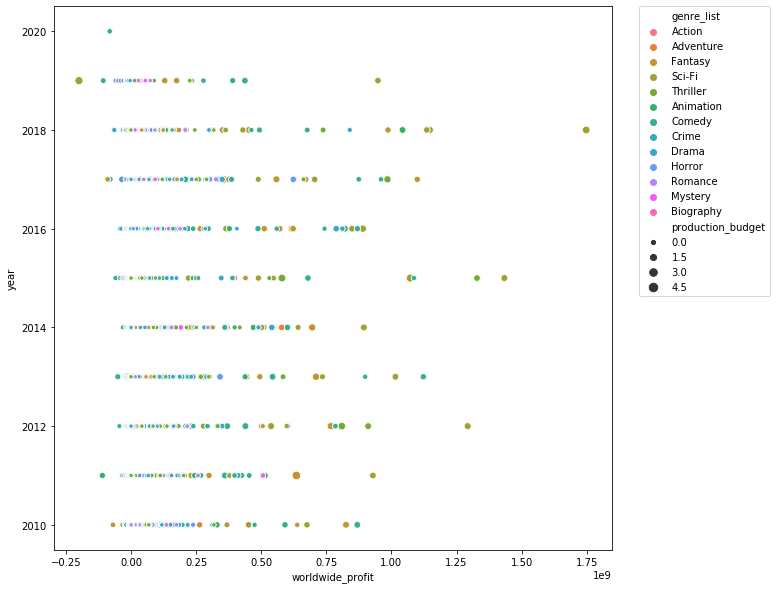

In [4]:
# plt.scatter(exploded_df.year, exploded_df.worldwide_profit, s=exploded_df.production_budget, c=exploded_df.genre_list)
# plt.show()
plt.figure(figsize=(10,10))
g = sns.scatterplot(y="year", x="worldwide_profit",
                    data=exploded_df[exploded_df.genre_list.isin(genre_cats.index)],
                    hue='genre_list', size="production_budget")
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.show()

In [5]:
exploded_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Action
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Adventure
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Fantasy
1,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-307237650.0,-200237650.0,0.122178,0.427892,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Action
1,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-307237650.0,-200237650.0,0.122178,0.427892,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Adventure


In [6]:
pivoted = exploded_df[exploded_df.genre_list.isin(['Action', 'Adventure', 'Animation', 'Sci-Fi'])]\
            .pivot_table(index=['year', 'genre_list'],
                         aggfunc={'worldwide_profit':'mean',
                                  'worldwide_roi':['mean', 'median', 'max', 'min']})
pivoted.head()

exploded_df['release_date'] = pd.to_datetime(exploded_df['release_date'])

In [7]:
pivoted = exploded_df[exploded_df.genre_list.isin(['Action', 'Adventure', 'Animation', 'Sci-Fi'])]\
            .pivot_table(index=['release_date', 'genre_list'],
                         aggfunc={'worldwide_profit':'mean',
                                  'worldwide_roi':['mean', 'median', 'max', 'min']})
#pivoted.plot.scatter('release_date', 'worldwide_profit', hue='genre_list')

(733408.0, 737577.0)

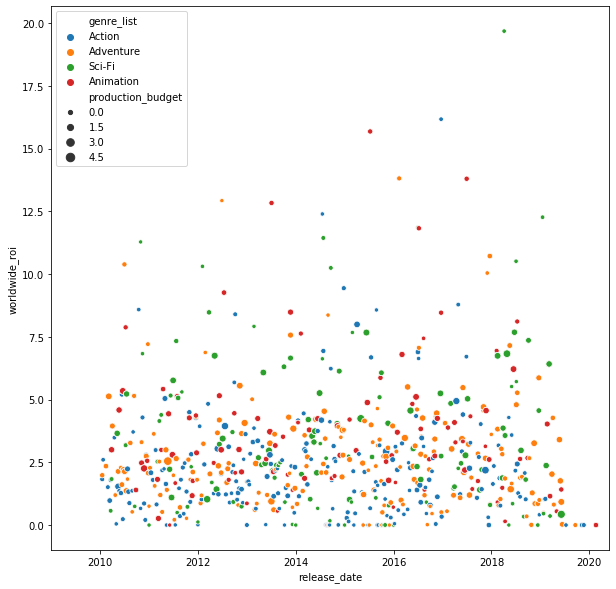

In [8]:
import datetime
# plt.figure(figsize=(10,10))
# g = sns.scatterplot(x="release_date", y="worldwide_profit",
#                     data=pivoted,
#                     hue='genre_list')#, size="production_budget")
# g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# plt.show()

pivoted = exploded_df[exploded_df.genre_list.isin(['Action', 'Adventure', 'Animation', 'Sci-Fi'])]\
    .pivot_table(index=['release_date', 'genre_list'], values=['worldwide_roi', 'production_budget'])\
    .reset_index()

plt.figure(figsize=(10,10))
g = sns.scatterplot(x='release_date', y='worldwide_roi', hue='genre_list', size='production_budget', data=pivoted)
g.set_xlim(datetime.date(2009, 1, 1), datetime.date(2020, 6, 1))
#plt.show()

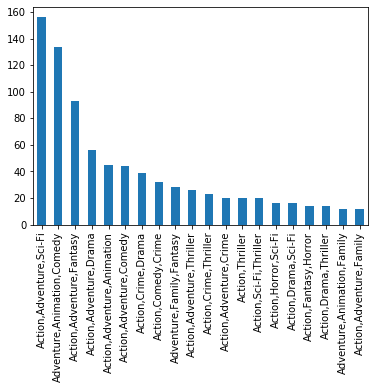

In [9]:
top_five = exploded_df[exploded_df.genre_list.isin(['Action', 'Adventure', 'Animation','Fantasy', 'Sci-Fi'])]

top_five.genres.value_counts().head(20).plot.bar()

In [10]:
top_five.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Action
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Adventure
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Fantasy
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-307237650.0,-200237650.0,0.122178,0.427892,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Action
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-307237650.0,-200237650.0,0.122178,0.427892,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Adventure


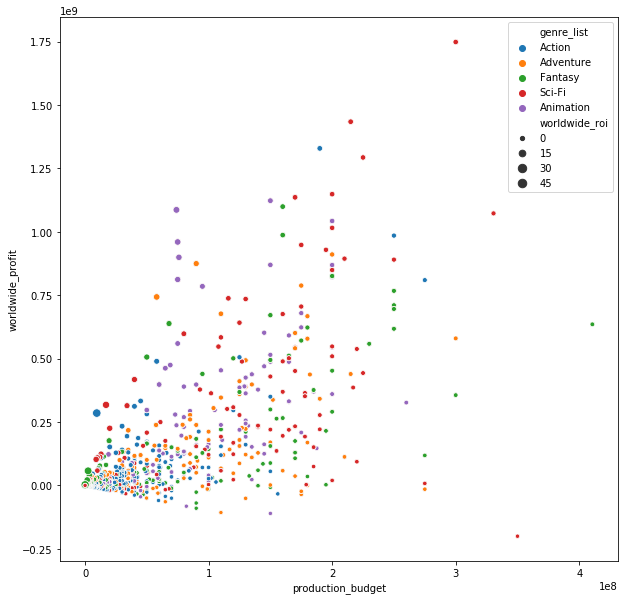

In [11]:
fig1 = plt.figure(figsize=(10,10))
g = sns.scatterplot(x='production_budget', y='worldwide_profit', hue='genre_list', size='worldwide_roi', data=top_five)
#g.set_xlim(datetime.date(2009, 1, 1), datetime.date(2020, 6, 1))

#exploded_df.plot(kind='scatter', x='production_budget', y='worldwide_profit', color='genre_list')

fig1.savefig('waytoomuchinoneplace.png')

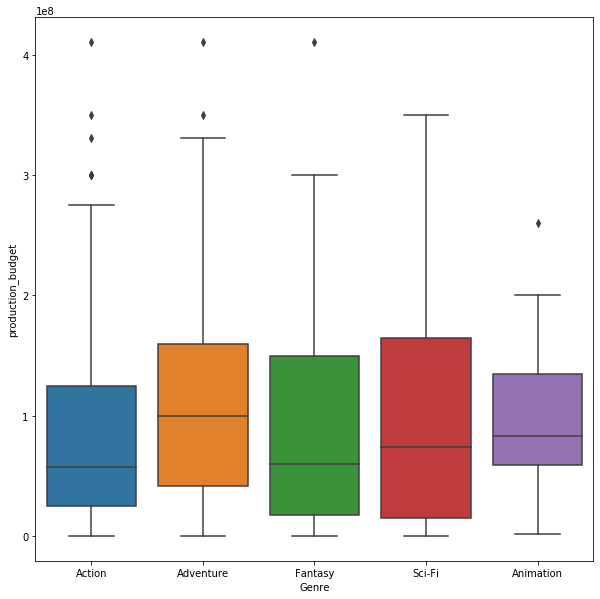

In [39]:
fig = plt.figure(figsize=(10, 10))
box = sns.boxplot(x="genre_list", y="production_budget", data=top_five)
box.set_xlabel('Genre')
plt.show()

fig.savefig('top_five_genres_budget_boxplot.png')

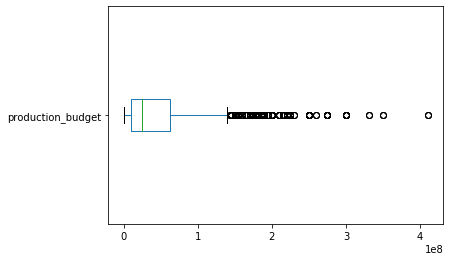

In [13]:
exploded_df.production_budget.plot.box(vert=False)
#df.production_budget.plot.box(vert=False)

In [14]:
top_five.describe()

,id,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,start_year,runtime_minutes
count,1165.000000,1.165000e+03,1.165000e+03,1.165000e+03,1165.000000,1.165000e+03,1.165000e+03,1165.000000,1165.000000,1165.000000,1157.000000
mean,49.119313,9.101008e+07,1.057410e+08,2.955917e+08,2014.187983,1.473089e+07,2.045816e+08,1.206367,2.994587,2014.187983,110.425238
std,28.731791,7.403093e+07,1.240363e+08,3.385136e+08,2.665780,9.299222e+07,2.876543e+08,1.403795,2.877663,2.665780,18.607371
min,1.000000,7.000000e+04,0.000000e+00,0.000000e+00,2010.000000,-3.072376e+08,-2.002376e+08,0.000000,0.000000,2010.000000,47.000000
25%,25.000000,3.000000e+07,2.086864e+07,4.217454e+07,2012.000000,-2.694988e+07,5.361206e+06,0.410775,1.176696,2012.000000,96.000000
50%,48.000000,7.500000e+07,5.987452e+07,1.646404e+08,2014.000000,-3.000000e+06,8.685609e+07,0.873272,2.375425,2014.000000,107.000000
75%,73.000000,1.450000e+08,1.509479e+08,4.280563e+08,2016.000000,3.450937e+07,3.014569e+08,1.434594,4.022382,2016.000000,123.000000
max,100.000000,4.106000e+08,7.000596e+08,2.048134e+09,2020.000000,5.000596e+08,1.748134e+09,16.016673,31.016276,2020.000000,172.000000


In [17]:
top_five['budget_quantile'] = pd.qcut(top_five.production_budget, q=4)

top_five.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_list,budget_quantile
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Action,"(145000000.0, 410600000.0]"
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Adventure,"(145000000.0, 410600000.0]"
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,-169536125.0,635063875.0,0.587101,2.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Fantasy,"(145000000.0, 410600000.0]"
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-307237650.0,-200237650.0,0.122178,0.427892,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Action,"(145000000.0, 410600000.0]"
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-307237650.0,-200237650.0,0.122178,0.427892,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Adventure,"(145000000.0, 410600000.0]"


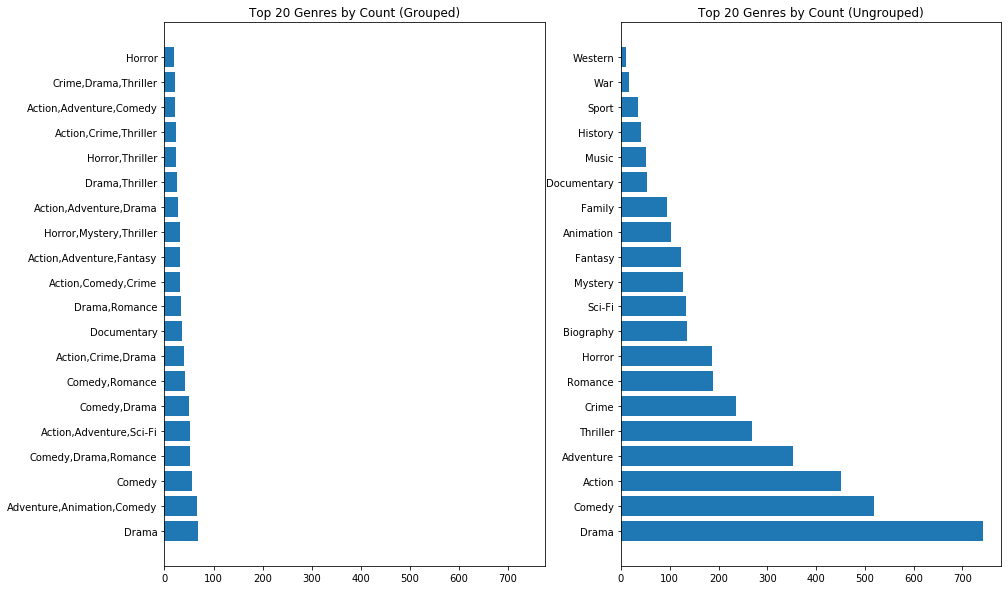

In [12]:
genre_bars_fig = plt.figure(figsize=(15, 10))
og_bars = genre_bars_fig.add_subplot(121)
exploded_bars = genre_bars_fig.add_subplot(122)

og_bars.barh(df.genres.value_counts().head(20).index, width=df.genres.value_counts().head(20))
exploded_bars.barh(exploded_df.genre_list.value_counts().head(20).index, width=exploded_df.genre_list.value_counts().head(20))
exploded_bars.set_title('Top 20 Genres by Count (Ungrouped)')
og_bars.set_title('Top 20 Genres by Count (Grouped)')
og_bars.set_xlim(0, 775)
plt.show()
genre_bars_fig.savefig('genre_comparison.png')